In [13]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### Describe the data
- The "mpg" dataset contains data on car fuel efficiency (miles per gallon) and other attributes for various car models from 1970 to 1982 

#### Attribute Information: 
- mpg: Continuous, representing miles per gallon. 
- cylinders: Multi-valued discrete, representing the number of cylinders. 
- displacement: Continuous, representing engine displacement. 
- horsepower: Continuous, representing engine horsepower. 
- weight: Continuous, representing vehicle weight. 
- acceleration: Continuous, representing acceleration time. 
- model year: Multi-valued discrete. 
- origin: Multi-valued discrete, representing the car's country of origin. 
- car name: String, unique for each instance. 


In [14]:
#Load and explore the dataset
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


First we explore the correlation between the various variables

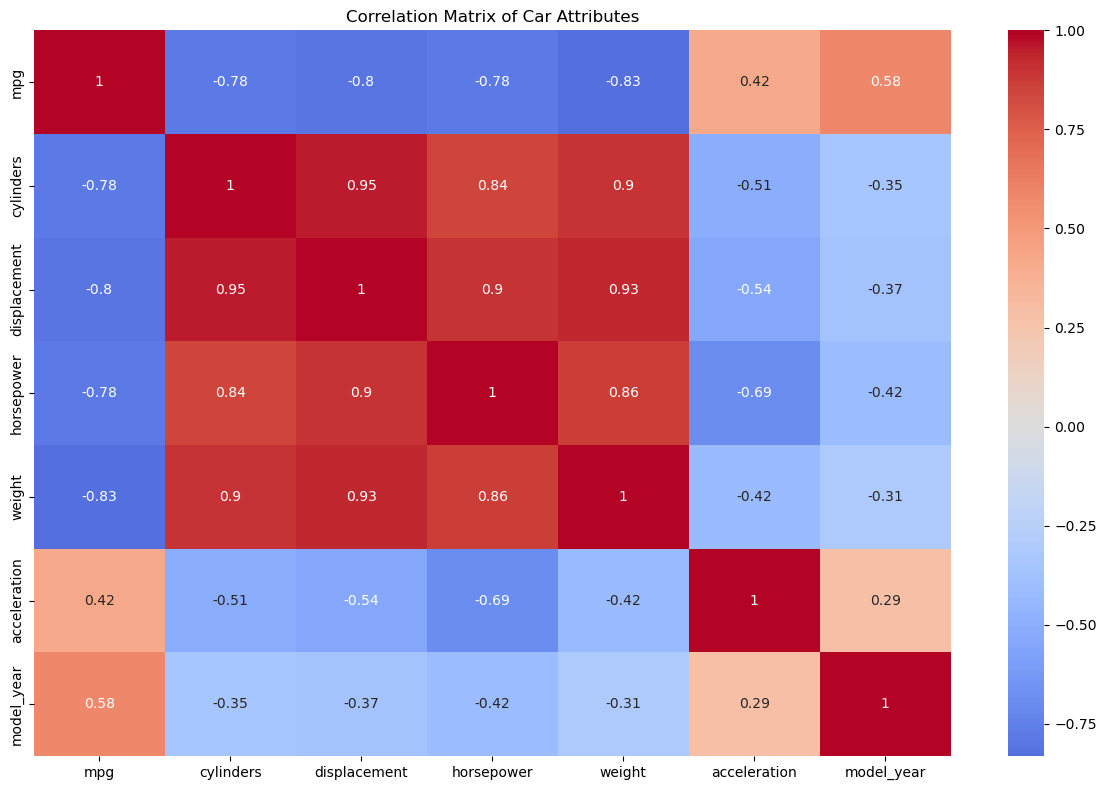

In [15]:
#Calculate and visualize correlation matrix
correlation_matrix = cars.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Car Attributes')
plt.tight_layout()
plt.show()


### Findings
we can see very high negative correlations between miles per gallon and the weight of the vehicle 
- Can we therefore conclude that the efficiency of a vehicle(MPG) decreases as the weight of the vehicle increases?
- note that weight also has high positive corrlations with the number of cylinders

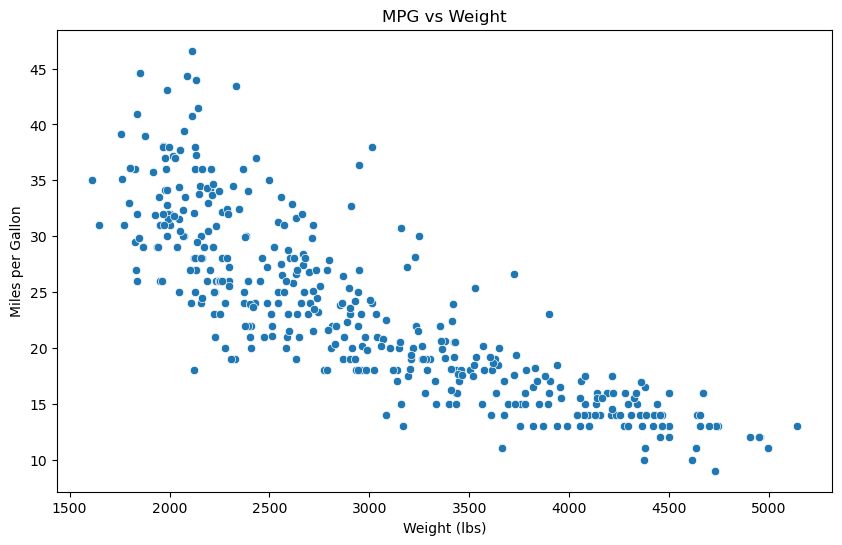

In [16]:
#Analyze MPG vs Weight relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars, x='weight', y='mpg')
plt.title('MPG vs Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles per Gallon')
plt.show()

In [17]:
corr_coef, p_value = stats.pearsonr(cars['weight'], cars['mpg'])
print(f"Correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3e}")

Correlation coefficient: -0.832
P-value: 2.973e-103


### we've observed that there's a high correlation between weight and mpg 
The p value however is almost zero, indicating that \
the relationship between weight and miles per gallon (MPG) is statistically significant. A near-zero p-value suggests 
that the likelihood of observing such a strong correlation purely by chance is extremely low, meaning that weight is 

likely to have a genuine effect on MPG. In other words, as vehicle weight increases, MPG tends to decrease, and this  trend is not just random variation but a meaningful pattern in the data.

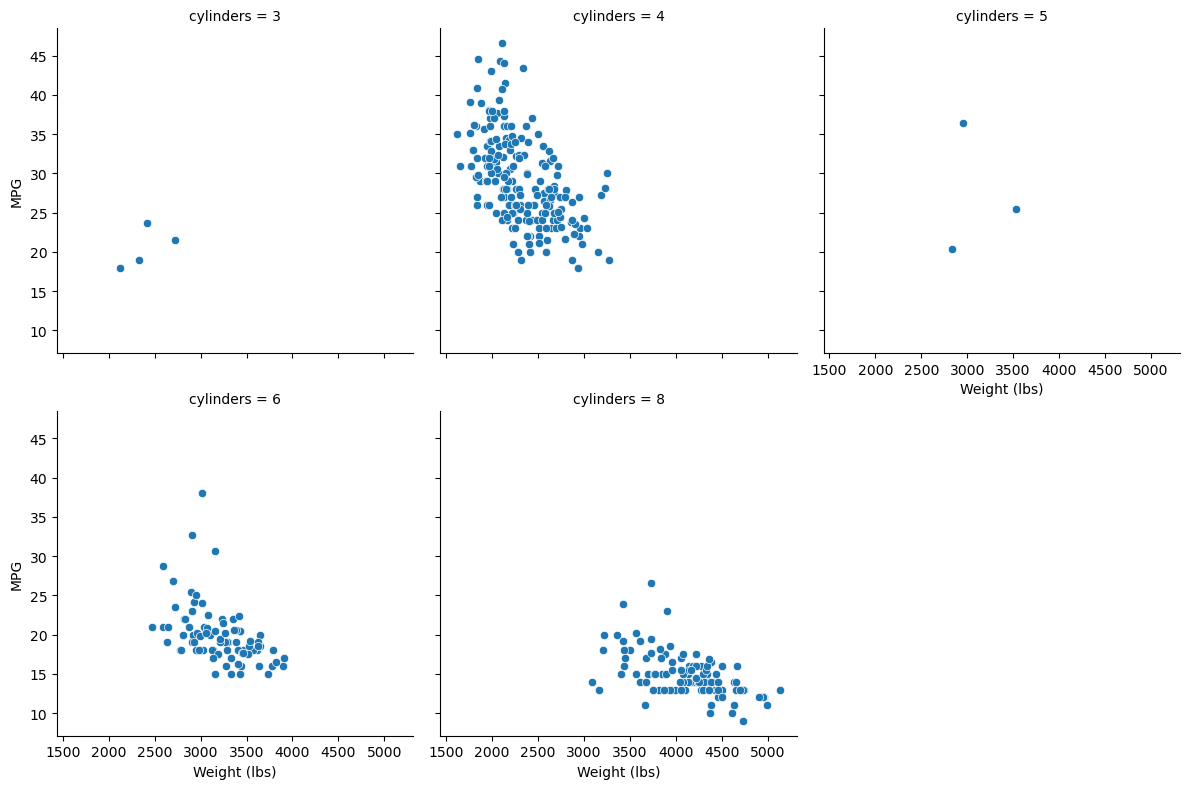

In [18]:
#Demonstrate Simpson's Paradox
g = sns.FacetGrid(cars, col='cylinders', col_wrap=3, height=4)
g.map(sns.scatterplot, 'weight', 'mpg')
g.set_axis_labels('Weight (lbs)', 'MPG')
plt.tight_layout()
plt.show()

In [19]:
# Calculate correlations within each cylinder group
for cyl in cars['cylinders'].unique():
    subset = cars[cars['cylinders'] == cyl]
    corr_coef, p_value = stats.pearsonr(subset['weight'], subset['mpg'])
    print(f"Cylinders {cyl}: Correlation = {corr_coef:.3f}, P-value = {p_value:.3e}")

Cylinders 8: Correlation = -0.557, P-value = 1.003e-09
Cylinders 4: Correlation = -0.543, P-value = 4.788e-17
Cylinders 6: Correlation = -0.463, P-value = 9.019e-06
Cylinders 3: Correlation = 0.619, P-value = 3.808e-01
Cylinders 5: Correlation = -0.048, P-value = 9.697e-01


howver by varying the number of cylinders, we observe that correlation and p-value  between weight and mpg changes dramatically  
- The relationship between **weight and MPG** is affected by the number of cylinders in a vehicle.
- When cylinder count changes, both **correlation strength** and **p-value** between weight and MPG also shift.
- This demonstrates that **cylinder count acts as a confounding variable**, influencing fuel efficiency beyond just weight.
- More cylinders typically mean larger engines, higher power output, and altered fuel consumption patterns.
- These factors can either **strengthen or weaken** the observed correlation between weight and MPG.


And This is exactly why causal machine learning plays and important role; Traditional ML can learn this pattern and make predictions based just on the observed pattern
